![Ironhack logo](https://i.imgur.com/1QgrNNw.png)
# LAB | Statistics Visualization

## Introduction
We'll use the datasets to have a deeper understanding of some important variable distributions.

We'll understand how to:
- have a glance on the statistics distribution just by observing the main statistical numerical description of our dataset.
- understand the effect of a normal and non-normal distribution on our outlier analysis
- understand how one variable can impact on another variable distribution

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read dataset from `weight-height-money.csv`.

Take a look at the first rows of the dataset.

In [2]:
data = pd.read_csv('data/weight-height-money.csv')

data.head()

,Gender,Height,Weight,Money
0,Male,73.847017,241.893563,21.462754
1,Male,68.781904,162.310473,94.732358
2,Male,74.110105,212.740856,130.077362
3,Male,71.730978,220.042470,214.096064
4,Male,69.881796,206.349801,765.091245


## Use the describe method to understand the data.

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.367560,3.847528,5.426313e+01,63.505620,66.318070,69.174262,78.998742
Weight,10000.0,161.440357,32.108439,6.470013e+01,135.818051,161.212928,187.169525,269.989699
Money,10000.0,631.156464,806.048057,1.735664e-07,89.067202,339.087164,851.540411,8168.216190


## What can you observe? Compare mean and median values for each variable of our dataset.

- `Height: have very close mean and median`
- `Weight: have very close mean and median`
- `Money: have very different mean and median`

## From that observation, what can you conclude? Can you imagine which kind of distribution each one has?

Try to predict which category each variable most likely seems to fall into (without plotting it yet):
- Left skewed
- Right skewed
- Gaussian-like

_hint: Remember the effect of outliers on the mean and median values. Usually, the comparison between mean and median already leads us to meaningful insights regarding the variable's distribution. If mean and median are close, you can suppose that most of the data is concentrated in a region within the mean. However, if median and mean are far apart, you can suppose that some observations are pulling the mean closer to them._

- `Height: Gaussian-like`
- `Weight: Gaussian-like`
- `Money: Left Skewed`

# Univariate Analysis

## Gender count

Count how many Male and Female exist on this dataset using pandas. 

In [4]:
data.groupby('Gender').count()

,Height,Weight,Money
Gender,,,
Female,5000,5000,5000
Male,5000,5000,5000


In [5]:
# Method 2
data['Gender'].value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

## Visual gender count

Use seaborn (sns) to visually see how many male and female exist on the dataset.

_hint: If you don't know how to do this, you can google: seaborn + the pandas method to count itens_

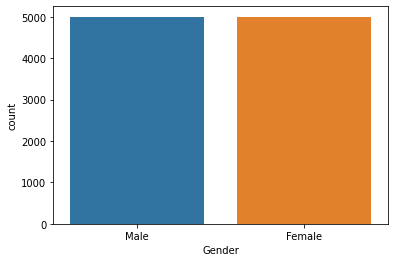

In [6]:
sns.countplot(x=data['Gender']);

## Consider only Height

Create a pandas series of the `height` variable.

In [7]:
height = data['Height']
height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

### Histogram-plot

Plot the histogram of the `height`

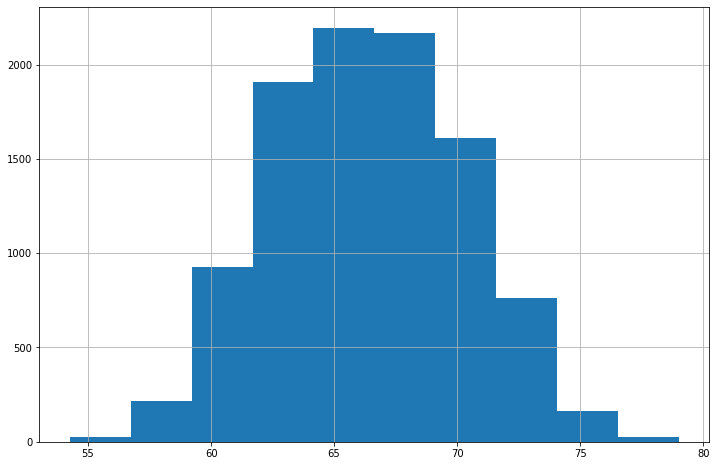

In [8]:
plt.figure(figsize=(12, 8))

height.hist();

### Box-plot

Plot the boxplot of the `height`

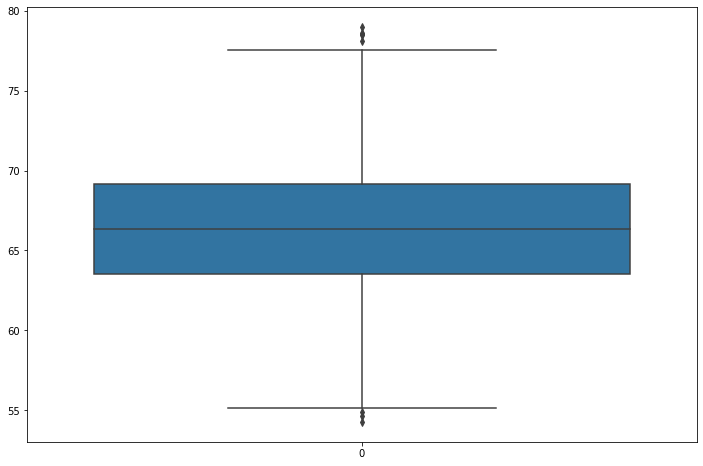

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=height);

What do you think the distribution of `height` is like? Do you think it is common for variables to behave like that in real life?

In [10]:
# your answer here

### KDE distribution for height

Plot the kde (kernel-density-estimation) distribution (without the hist distribution) of the `height`.

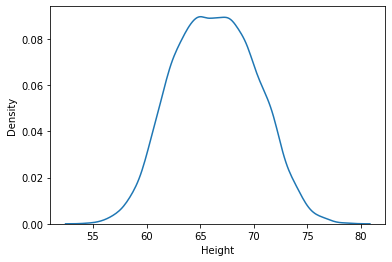

In [11]:
sns.kdeplot(data=height);

### Analysis

As we can see we have a high count for height in the range near 60 to 75. How many people fall off 3 standard deviations from the mean? Can you consider them outliers? Why is that?

In [12]:
#Full response
condition = data['Height'].mean() + 3*data['Height'].std()
condition2 = data['Height'].mean() - 3*data['Height'].std()

mask = (data['Height'] > condition) | (data['Height'] < condition2)

data[mask].count()

Gender    7
Height    7
Weight    7
Money     7
dtype: int64

#### Calculate the mean

In [13]:
mean = height.mean()
mean

66.36755975482124

#### Calculate the standard deviation 

In [14]:
standard_deviation = height.std()
standard_deviation

3.8475281207732284

#### Calculate the values for the cutoffs:

`upper_cutoff = mean` <b><span style="color:red">+</span></b> `3 * standard_deviation` 

`lower_cutoff = mean` <b><span style="color:red">-</span></b> `3 * standard_deviation`

In [15]:
upper_cutoff = mean + 3 * standard_deviation
lower_cutoff = mean - 3 * standard_deviation
upper_cutoff, lower_cutoff

(77.91014411714093, 54.82497539250156)

#### Now filter the original dataset. 

Use the values you calculated above to filter the original dataset. 

You should obtain a filtered dataset containing only the rows in which the `Height` column is greater than the upper cutoff and lower than the lower cutoff.

In [16]:
data[(data['Height'] > upper_cutoff) | (data['Height'] < lower_cutoff)]

,Gender,Height,Weight,Money
994,Male,78.095867,255.690835,1357.105000
1317,Male,78.462053,227.342565,5.457968
2014,Male,78.998742,269.989699,131.474470
3285,Male,78.528210,253.889004,0.089663
3757,Male,78.621374,245.733783,204.113245
6624,Female,54.616858,71.393749,226.061310
9285,Female,54.263133,64.700127,646.532185


#### Finally, calculate the shape of this filtered dataset and compare with the original dataframe.

Which percentage felt in these thresholds? Did you expect this value? Why?

In [17]:
df_height = data[(data['Height'] > upper_cutoff) | (data['Height'] < lower_cutoff)]
df_height.shape

(7, 4)

In [18]:
data.shape

(10000, 4)

In [19]:
print(len(df_height)*100/len(data),'%')

0.07 %


## Now perform the same analysis for `money` variable.

You'll do exactly the same analysis for a variable of your dataset that has some different aspects. Let's try to understand that.

## Consider only Money

Create a pandas series of the `money` variable.

In [20]:
money = data['Money']
money

0         21.462754
1         94.732358
2        130.077362
3        214.096064
4        765.091245
           ...     
9995     240.933121
9996    1220.781276
9997       0.258369
9998    1552.920529
9999    2232.337002
Name: Money, Length: 10000, dtype: float64

In [21]:
money.shape

(10000,)

### Histogram-plot

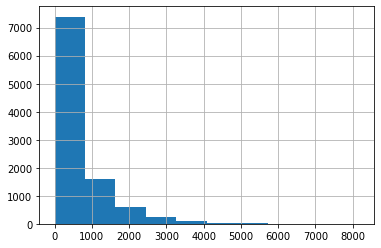

In [22]:
money.hist();

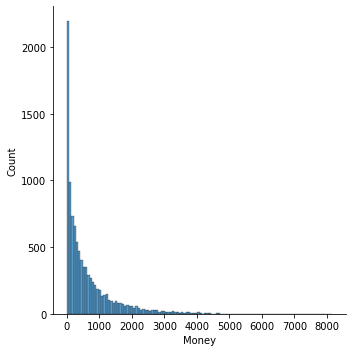

In [23]:
# or
sns.displot(money, kde = False);

### Box-plot

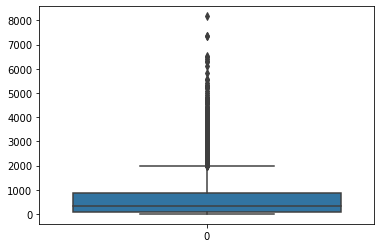

In [24]:
sns.boxplot(data=money);

### KDE distribution

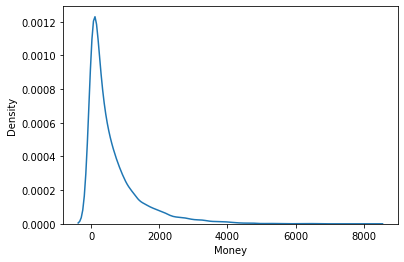

In [25]:
sns.kdeplot(money);

### Analysis

Again, how many people fall off 3 standard deviations in both cases (which percentage of the dataset)? Let's do it by parts:

#### Calculate the mean

In [26]:
mean = money.mean()
mean

631.1564641555965

#### Calculate the standard deviation 

In [27]:
standard_deviation = money.std()
standard_deviation

806.048057311861

#### Calculate the values for the cutoffs:

`upper_cutoff = mean` <b><span style="color:red">+</span></b> `3 * standard_deviation` 

`lower_cutoff = mean` <b><span style="color:red">-</span></b> `3 * standard_deviation`

In [28]:
upper_cutoff = mean + 3 * standard_deviation

lower_cutoff = mean - 3 * standard_deviation

upper_cutoff, lower_cutoff

(3049.3006360911795, -1786.9877077799865)

#### Again, filter the original dataset. 

In [29]:
data[(data['Money'] > upper_cutoff) | (data['Money'] < lower_cutoff)]

data[mask]

,Gender,Height,Weight,Money
994,Male,78.095867,255.690835,1357.105000
1317,Male,78.462053,227.342565,5.457968
2014,Male,78.998742,269.989699,131.474470
3285,Male,78.528210,253.889004,0.089663
3757,Male,78.621374,245.733783,204.113245
6624,Female,54.616858,71.393749,226.061310
9285,Female,54.263133,64.700127,646.532185


#### Finally, calculate the shape of this filtered dataset and compare with the original dataframe.

Which percentage felt in these thresholds? Did you expect this value?

In [30]:
money.shape

(10000,)

In [31]:
data.shape

(10000, 4)

In [32]:
print(len(money)*100/len(data),'%')

100.0 %


Can you consider them outliers?

In [33]:
# your answer here

By now, you should have observed that in order to consider an observation an `outlier`, one needs to take into account the **distribution** of the variable. In fact, most statistical aspects do not mean anything until you understand the variable's distribution.

# Bivariate Analysis

## Considering both height and weight

Now we'll consider both `Height` and `Weight` variables to understand our data. We'll perform what is called a bivariate analysis.

### Perform a scatterplot to check the relation between `Height` and `Weight`

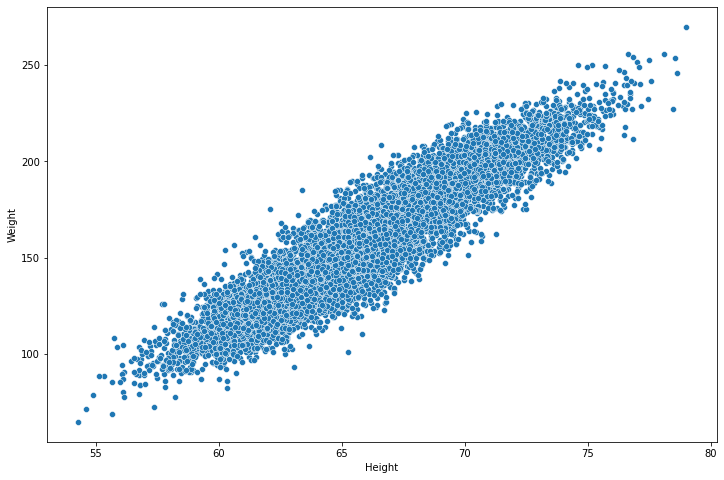

In [34]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x = 'Height', y = 'Weight', data = data);

### Do the same plot, but color the markers by Gender

<AxesSubplot:xlabel='Height', ylabel='Weight'>

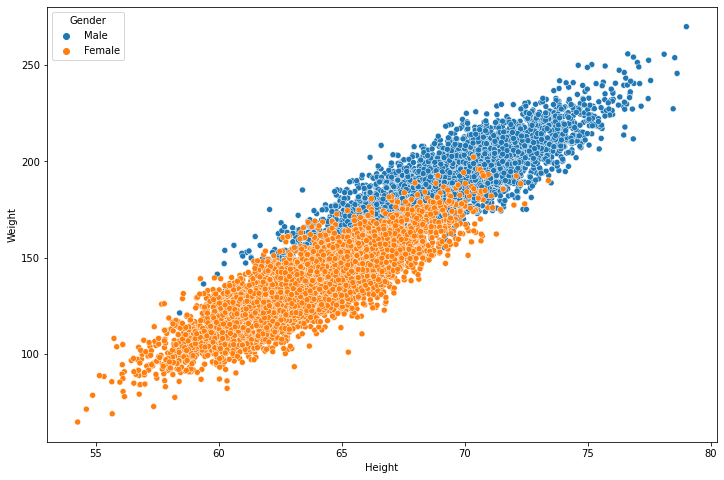

In [35]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x = 'Height', y = 'Weight', data = data, hue = 'Gender')

### Which insights hue'ing the plot using the variable Gender has brought to you? 

In [36]:
# your answer here

### Create a variable called `gender_groupby` to group data by `Gender`. However, don't define any aggregations yet. 

Just perform the groupby operation.

In [37]:
gender_groupby = data.groupby('Gender')

#### Run `gender_groupby.head()` to check the groups obtained.

In [38]:
gender_groupby.head()

,Gender,Height,Weight,Money
0,Male,73.847017,241.893563,21.462754
1,Male,68.781904,162.310473,94.732358
2,Male,74.110105,212.740856,130.077362
3,Male,71.730978,220.042470,214.096064
4,Male,69.881796,206.349801,765.091245
5000,Female,58.910732,102.088326,25.530452
5001,Female,65.230013,141.305823,270.612186
5002,Female,63.369004,131.041403,1114.256936
5003,Female,64.479997,128.171511,2194.127692
5004,Female,61.793096,129.781407,462.814462


#### Run gender_groupby.describe() to check the statistics for each group. 

_hint: You can transpose this result to obtain a better visualization of the results_


In [39]:
gender_groupby.describe().T

Gender             Female          Male
Height count  5000.000000  5.000000e+03
       mean     63.708774  6.902635e+01
       std       2.696284  2.863362e+00
       min      54.263133  5.840690e+01
       25%      61.894441  6.717468e+01
       50%      63.730924  6.902771e+01
       75%      65.563565  7.098874e+01
       max      73.389586  7.899874e+01
Weight count  5000.000000  5.000000e+03
       mean    135.860093  1.870206e+02
       std      19.022468  1.978115e+01
       min      64.700127  1.129029e+02
       25%     122.934096  1.738878e+02
       50%     136.117583  1.870335e+02
       75%     148.810926  2.003578e+02
       max     202.237214  2.699897e+02
Money  count  5000.000000  5.000000e+03
       mean    751.959852  5.103531e+02
       std     860.718215  7.276870e+02
       min       0.004195  1.735664e-07
       25%     162.499271  4.864892e+01
       50%     453.032412  2.320123e+02
       75%    1015.017353  6.670731e+02
       max    7347.139257  8.168216e+03

The results above should give you some insights of the effect of gender on your dataset both visually and numerically.

## Distribution plots

### Verifying the distribution of your variables for each Gender.

We have seen that each variable in our dataset has its own "DNA". This is the distribution of each variable. However, the story does not stop there. Each variable has peculiarities within it and it is our job as data analyst to discover it. We'll see futurely that what `machine learning models` mostly do for us is automate this process (if we understand them, of course) 

In this case, specifically, we want to understand the effect of our `Gender` variable on the distribution of our dataset.


### First, plot the distribution of the `Height` variable again.

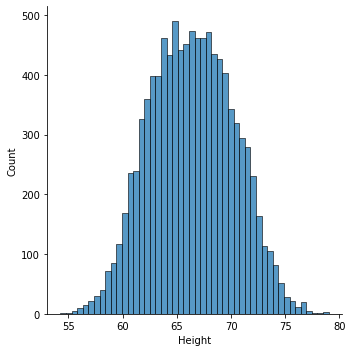

In [40]:
sns.displot(data=height, kde = False);

### Now, filter your dataset for each gender. Create a dataframe called `men` and another called `women` and plot the `Height` distribution for each of them in the same plot.

In [41]:
men = data[data['Gender'] == 'Male']
women = data[data['Gender'] == 'Female']

C:\Users\Rodrigo\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


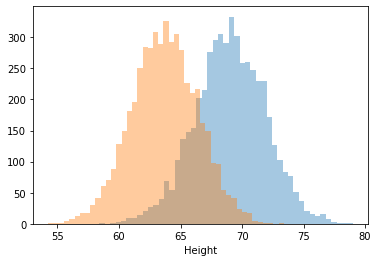

In [42]:
sns.distplot(men.Height, kde = False);
sns.distplot(women.Height, kde = False);

### What insights could you observe from that? What is the impact of `Gender` on `Height`

**Extra Note:** The issue: https://github.com/mwaskom/seaborn/issues/861 has a discussion of why distplot doesn't have a `hue` argument and how to overcome it (look for FacetGrid)

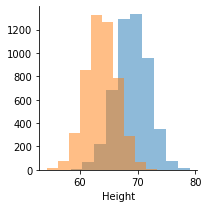

In [43]:
# using Facetgrid and map
g = sns.FacetGrid(data, hue = 'Gender')
g.map(plt.hist, 'Height', alpha = 0.5);

Try to do the same for the `Money` variable. What is the impact of `Gender` on `Money` ?

_Hint: for the Money variable, try specifying `hist=False`_


C:\Users\Rodrigo\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


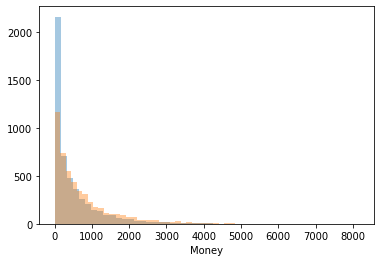

In [44]:
sns.distplot(men.Money, kde = False);
sns.distplot(women.Money, kde = False);

## Boxplot 

### Gender vs Height

Plot the boxplot considering the x-axis as `Gender` and y-axis as `Height`

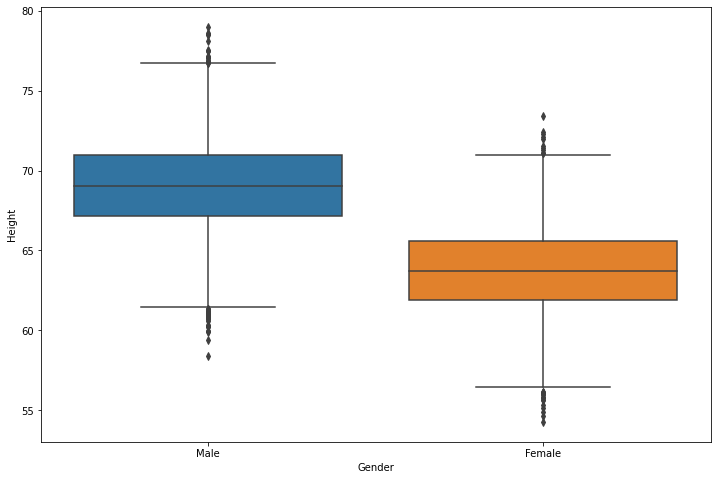

In [45]:
plt.figure(figsize=(12, 8))

sns.boxplot(x = 'Gender', y = 'Height', data = data);

### Gender vs Money

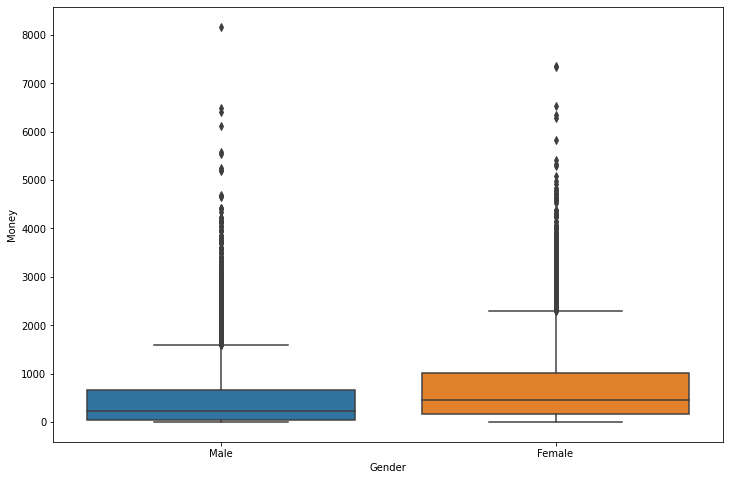

In [46]:
plt.figure(figsize=(12, 8))

sns.boxplot(x = 'Gender', y = 'Money', data = data);

From the conclusions of the previous exercises, did you expect the bloxplots to be like the ones above?

In [47]:
# your answer here

### Multivariate Analysis

Use `sns.pairplot` to see some combinations obtained so far. Use `hue = 'Gender`. 

Note that in a real problem, pairplot starts to get messy since there can be countless number of variables in a dataset. Use it wisely.

Usually people only plot this graph and don't take any conclusions from it. Don't fall into that trap. 

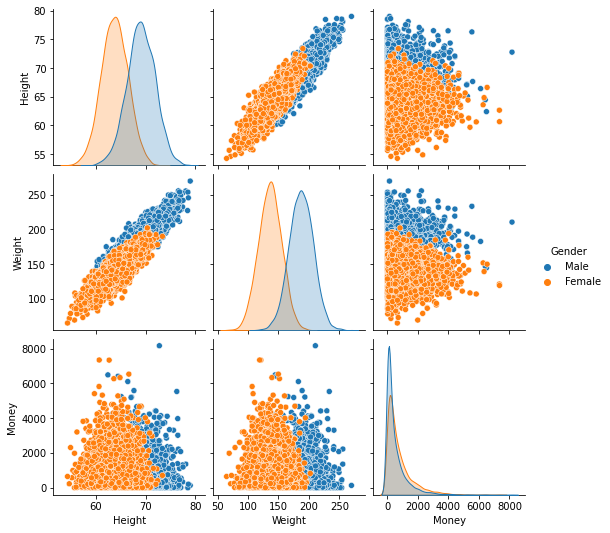

In [48]:
sns.pairplot(data, hue = 'Gender');